In [2]:
#Setup
import sys
sys.path.append('..')  # Add parent directory to path

from src.data_loader import DataLoader
from src.quality_analyzer import QualityAnalyzer
from src.visualizer import QualityVisualizer
import pandas as pd

print("Imports successful!")

Imports successful!


In [3]:
# Load sample data
loader = DataLoader()
df = loader.create_sample_data(n_records=1000)

print(f"Dataset loaded: {len(df)} records")
print(f"Columns: {', '.join(df.columns)}")
df.head()

INFO:src.data_loader:Creating sample dataset with 1000 records
INFO:src.data_loader:Created 1000 sample records


Dataset loaded: 1000 records
Columns: ApplicationNumber, FilingDate, MarkCategory, MarkFeature, MarkDescription, ImageFile, CurrentStatus, Classification


,ApplicationNumber,FilingDate,MarkCategory,MarkFeature,MarkDescription,ImageFile,CurrentStatus,Classification
0,CA1000000,1994-11-08,Word,None,None,None,Dead,Nice Class 8
1,CA1000001,1986-10-19,None,None,None,None,Registered,Nice Class 42
2,CA1000002,1990-08-21,None,None,None,None,Abandoned,Nice Class 37
3,CA1000003,1982-06-21,Word,None,None,image.png,Dead,Nice Class 9
4,CA1000004,2023-06-02,None,None,None,None,Registered,Nice Class 25


In [4]:
# Analyze quality
analyzer = QualityAnalyzer(df)
scores = analyzer.analyze_all()

print("\nQuality Scores:")
for dimension, score in scores.items():
    print(f"  {dimension.capitalize()}: {score:.2f}/5")

INFO:src.quality_analyzer:Running quality analysis...
INFO:src.quality_analyzer:Overall quality score: 3.80/5



Quality Scores:
  Accuracy: 5.00/5
  Completeness: 3.00/5
  Timeliness: 1.00/5
  Accessibility: 5.00/5
  Consistency: 5.00/5
  Overall: 3.80/5


In [5]:
# Generate visualizations
viz = QualityVisualizer(output_dir='../outputs')

viz.plot_temporal_distribution(df, 'FilingDate', 'Trademark Applications by Year')
viz.plot_missingness(analyzer.metrics['field_missingness'], 'Missing Values by Field')
viz.plot_quality_radar(scores, 'Data Quality Radar')

print("\nVisualizations saved to outputs/")

✓ Saved ../outputs/temporal_distribution.png
✓ Saved ../outputs/missing_values.png
✓ Saved ../outputs/quality_radar.png

Visualizations saved to outputs/


Temporal Distribution:


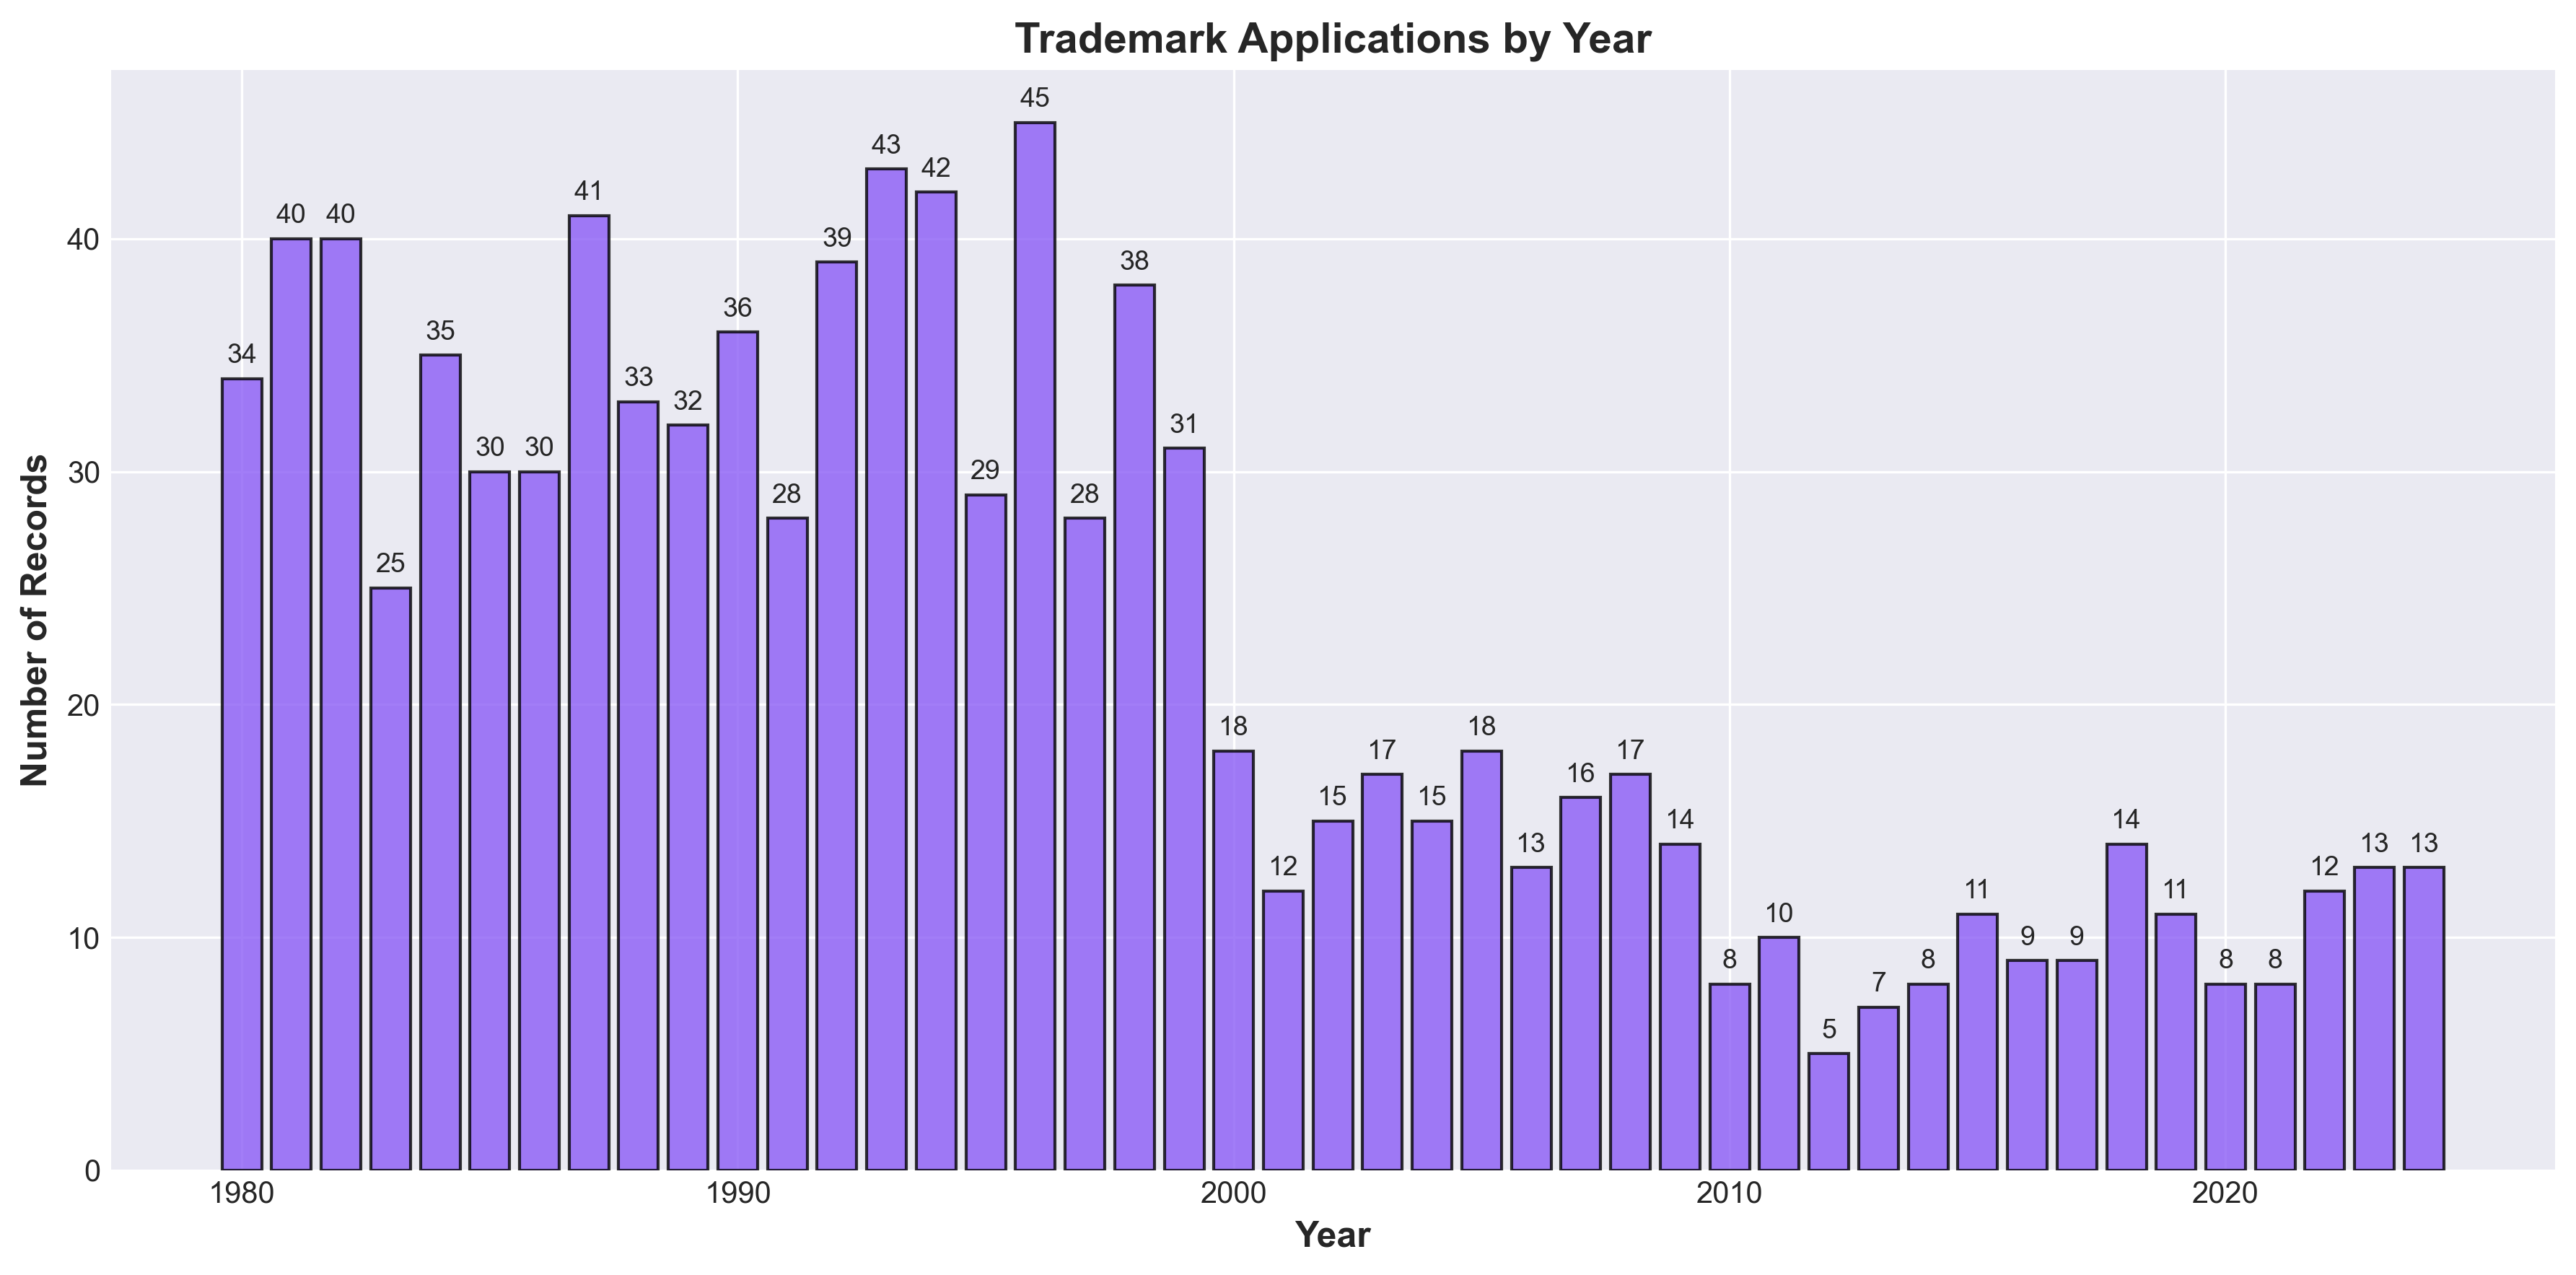


Missing Values:


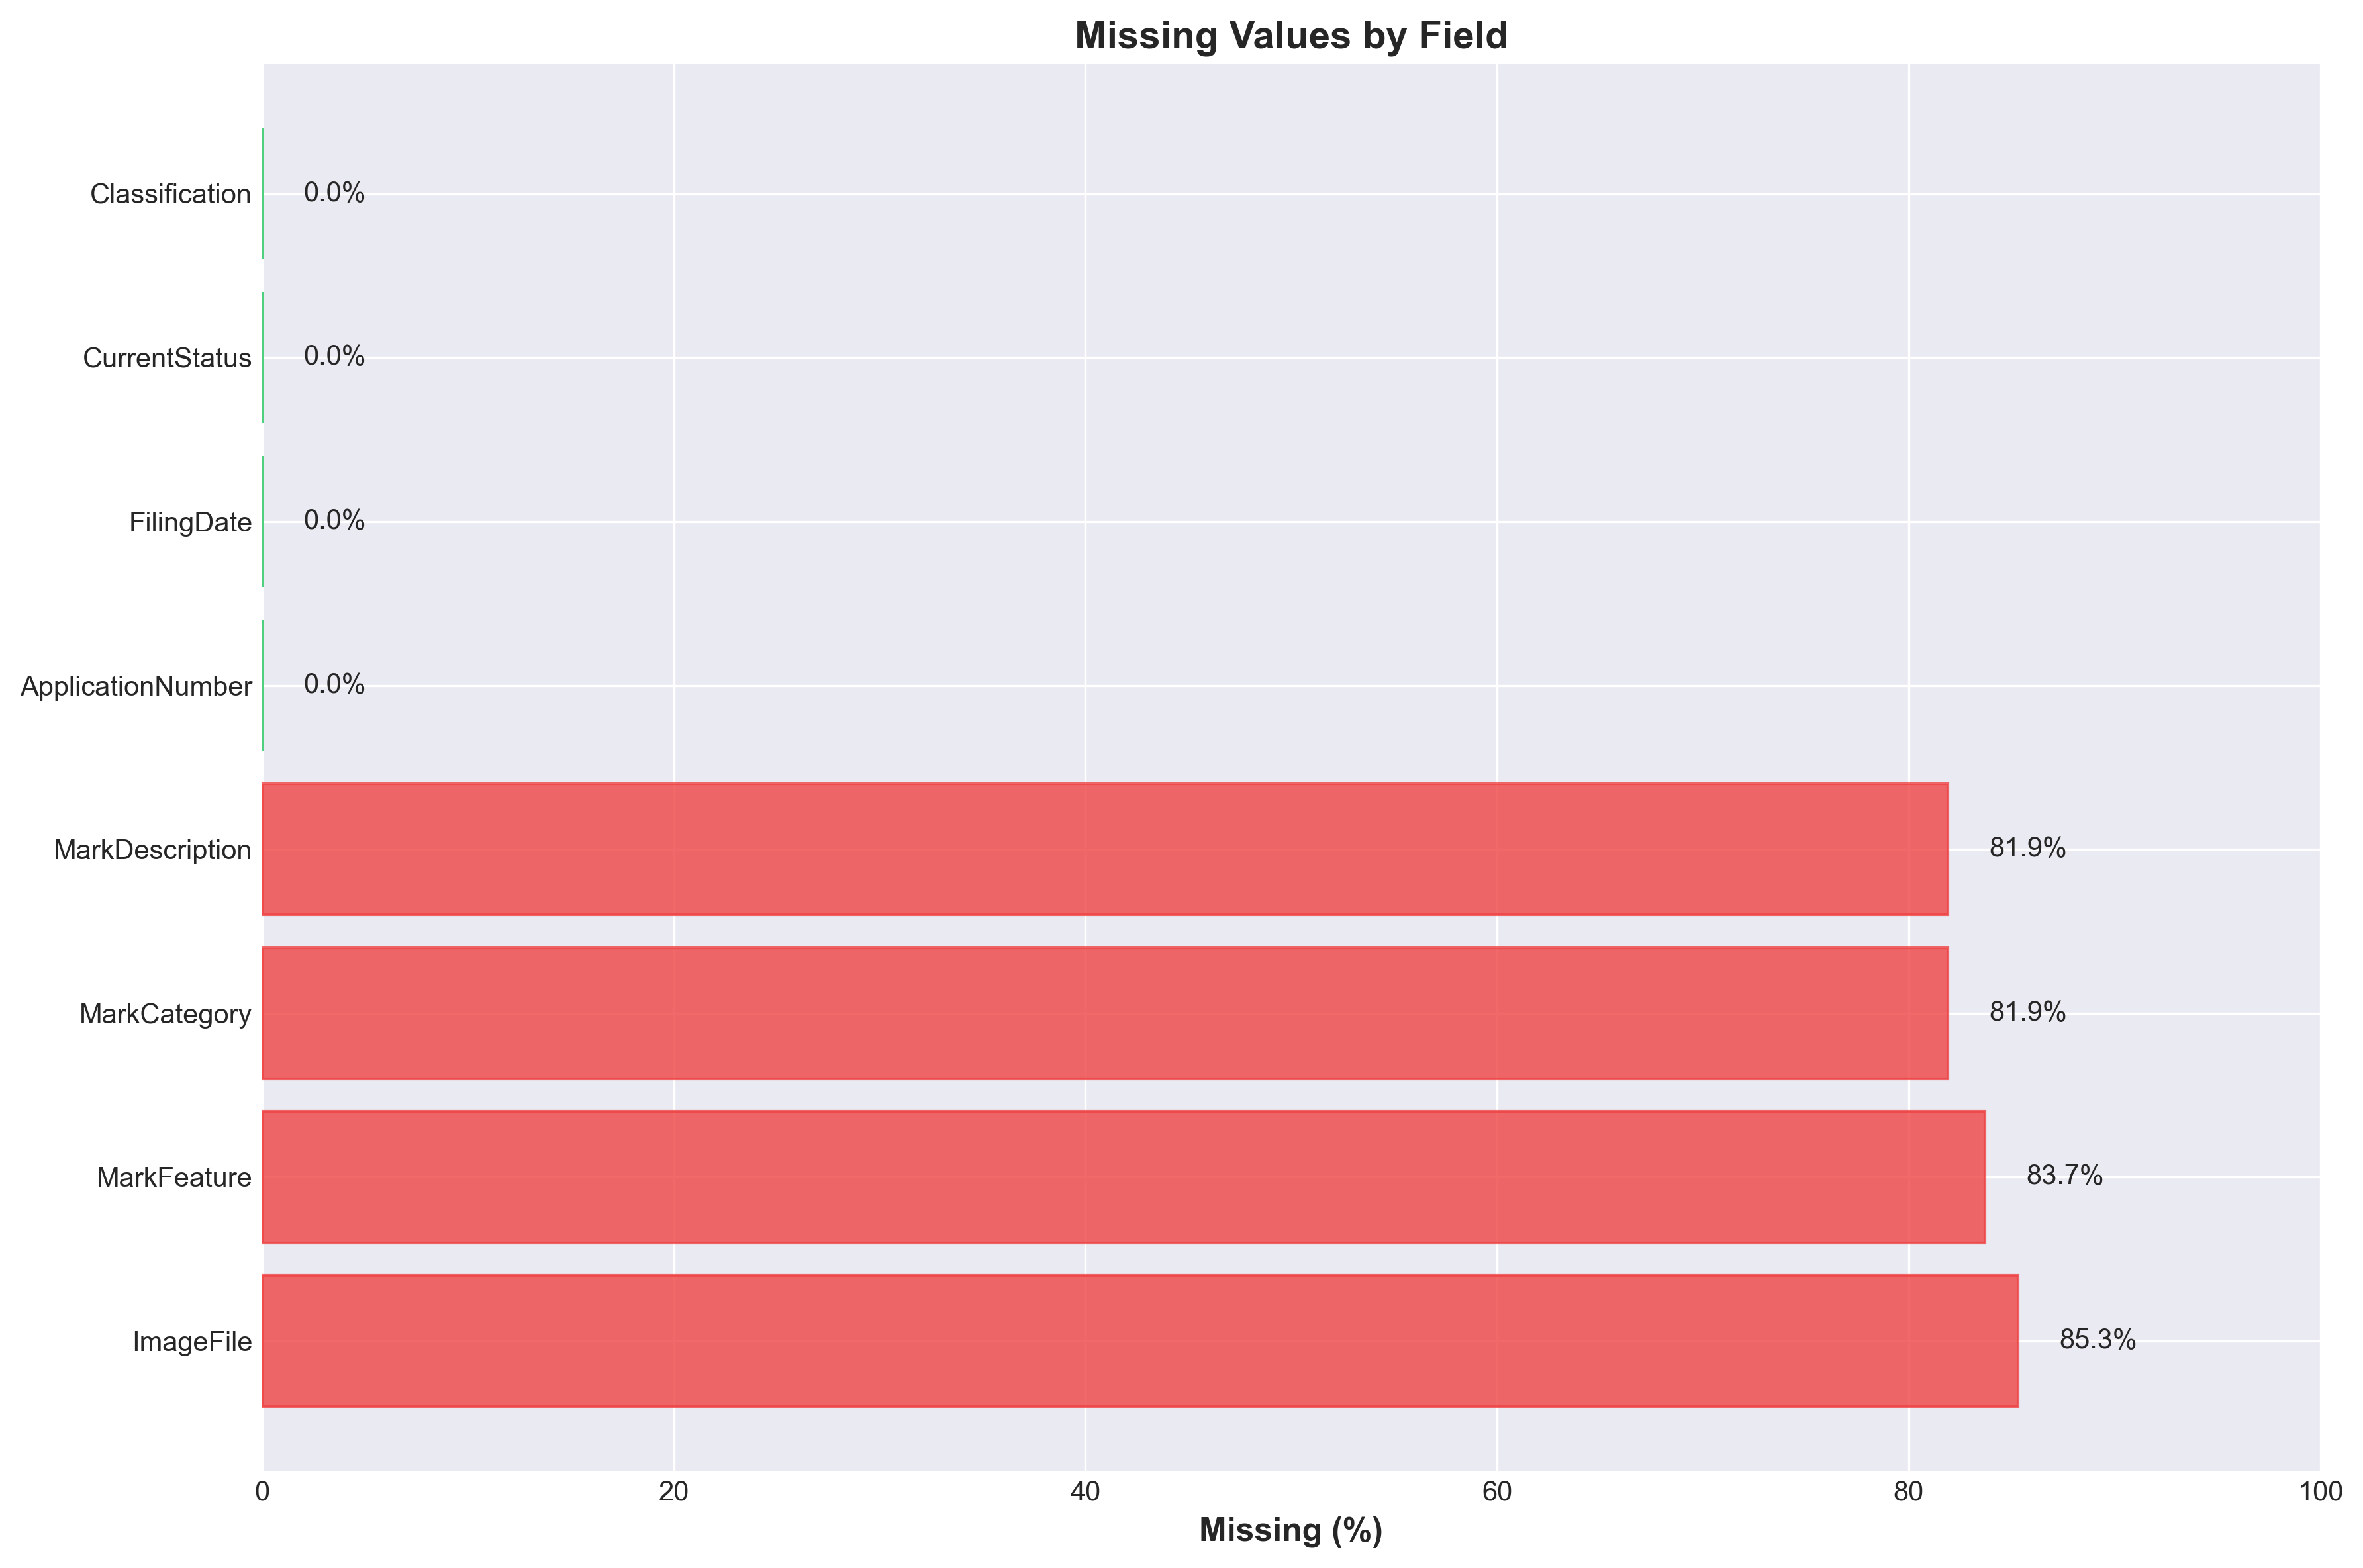


Quality Radar:


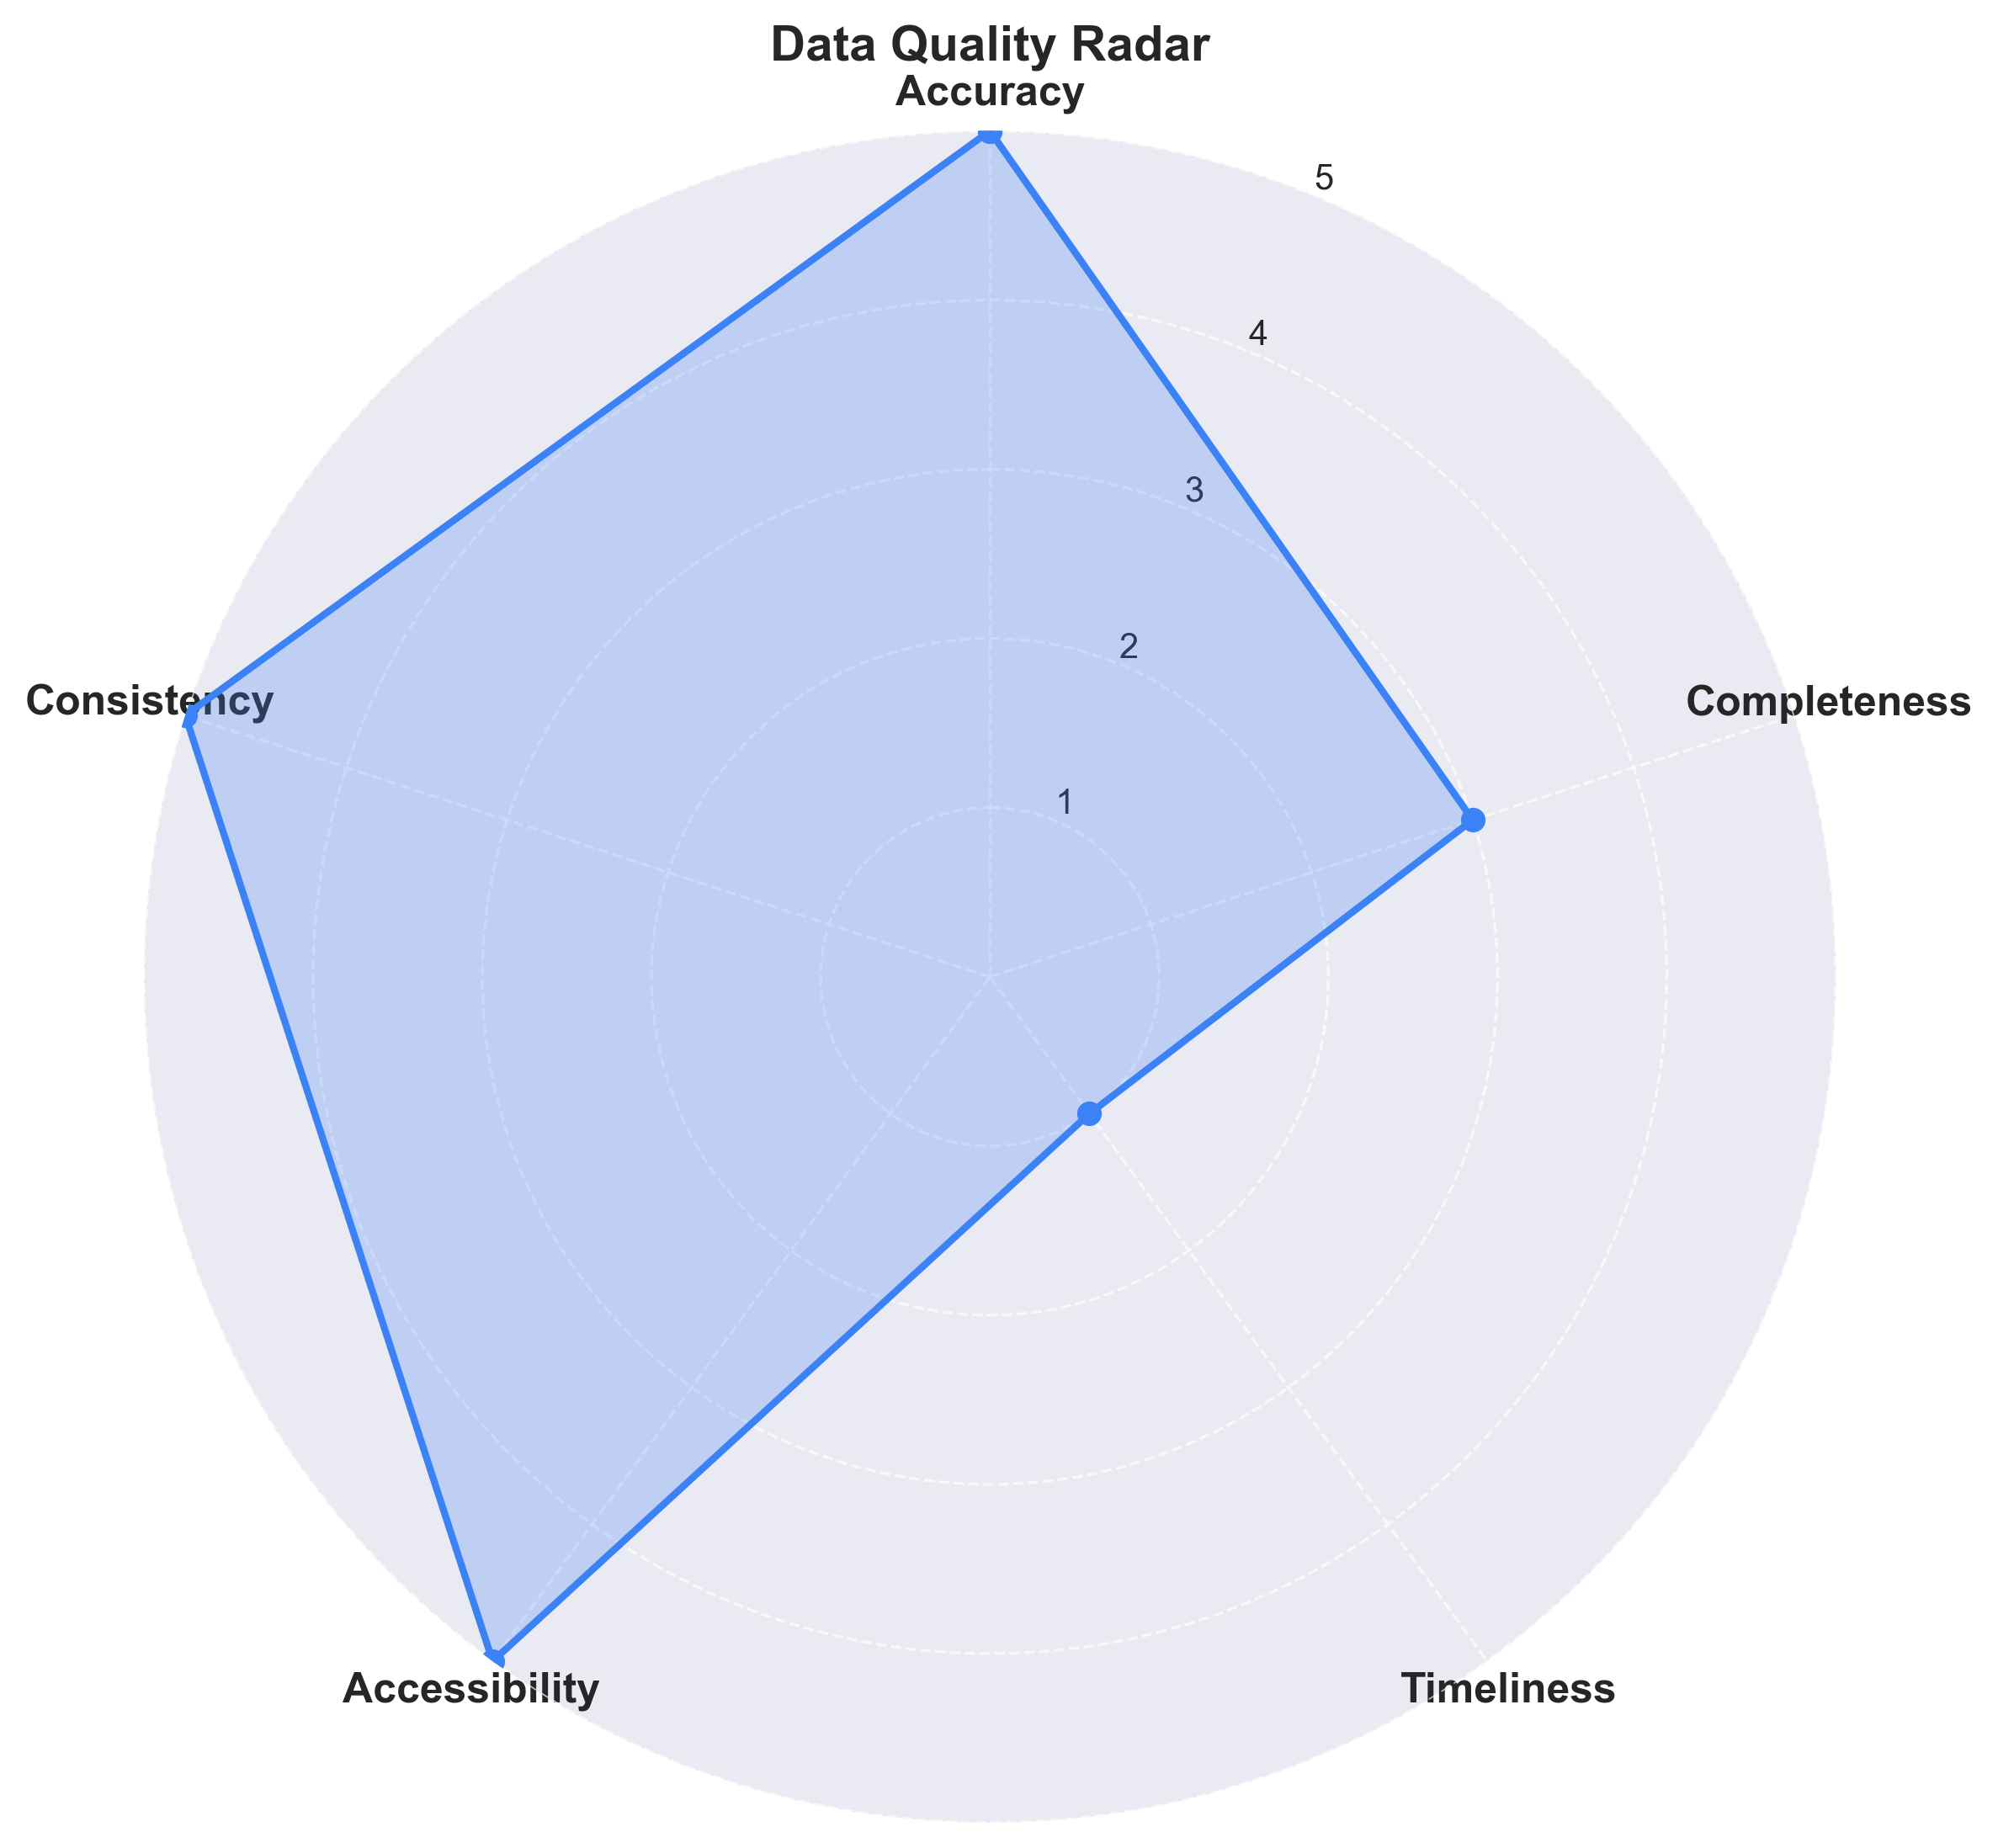

In [6]:
# Display results
from IPython.display import Image, display

print("Temporal Distribution:")
display(Image('../outputs/temporal_distribution.png'))

print("\nMissing Values:")
display(Image('../outputs/missing_values.png'))

print("\nQuality Radar:")
display(Image('../outputs/quality_radar.png'))